In [71]:
import os
import shutil # shell 명령 쓸 수 있게 하는 유틸리티

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models

In [72]:
# Original Data Path
original_dataset_dir = './datasets/train'

# Small Dataset Path
base_dir = './datasets/cats_and_dogs_small'

# 경로 잡아주기
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [73]:
# Train, Validation, Test data folder creation
train_dir = os.path.join(base_dir,'train') # join : 2개의 경로를 하나로 합칠 때 사용
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [74]:
# 필요한 경로 설정
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [75]:
# File copy

# fnames = []
# for i in range(1000):
#     filename = 'cat.{}.jpg'.format(i)
#     fnames.append(filename)
# print(fnames)

# cat train data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname) # 원본 경로
    dst = os.path.join(train_cats_dir,fname) # 복사할 경로
    shutil.copyfile(src,dst) # 복사 실행
    
# dog train data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname) # 원본 경로
    dst = os.path.join(train_dogs_dir,fname) # 복사할 경로
    shutil.copyfile(src,dst) # 복사 실행
    
print('----------------Train dataset copy completed--------------------')

----------------Train dataset copy completed--------------------


In [76]:
# cat validation data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname) # 원본 경로
    dst = os.path.join(validation_cats_dir,fname) # 복사할 경로
    shutil.copyfile(src,dst) # 복사 실행
    
# dog validation data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname) # 원본 경로
    dst = os.path.join(validation_dogs_dir,fname) # 복사할 경로
    shutil.copyfile(src,dst) # 복사 실행

print('----------------Validation dataset copy completed--------------------')

----------------Validation dataset copy completed--------------------


In [77]:
# cat test data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname) # 원본 경로
    dst = os.path.join(test_cats_dir,fname) # 복사할 경로
    shutil.copyfile(src,dst) # 복사 실행
    
# dog test data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname) # 원본 경로
    dst = os.path.join(test_dogs_dir,fname) # 복사할 경로
    shutil.copyfile(src,dst) # 복사 실행
    
print('----------------Test dataset copy completed--------------------')

----------------Test dataset copy completed--------------------


In [78]:
# listdir : 지정되어 있는 경로의 파일 목록 보여줌
print('Train cat images : ',len(os.listdir(train_cats_dir)))
print('Train dog images : ',len(os.listdir(train_cats_dir)))
print('Validation cat images : ',len(os.listdir(validation_cats_dir)))
print('Validation cat images : ',len(os.listdir(validation_cats_dir)))
print('Test cat images : ',len(os.listdir(test_cats_dir)))
print('Test cat images : ',len(os.listdir(test_cats_dir)))

Train cat images :  1000
Train dog images :  1000
Validation cat images :  500
Validation cat images :  500
Test cat images :  500
Test cat images :  500


In [79]:
# Build network
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3))) # 이미지가 3채널이기 때문에 끝에 3이 들어감. 흑백이면 1
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [80]:
from tensorflow.keras import optimizers
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [82]:
# Data Preprocessing

# Image scaling
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) # tensor로 바꿔주는 기능
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')

test_generator = train_datagen.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [83]:
for data_batch, labels_batch in train_generator:
    print('Batch Data Size : ',data_batch.shape)
    print('Batch Label Size : ',labels_batch.shape)
    break

Batch Data Size :  (20, 150, 150, 3)
Batch Label Size :  (20,)


In [85]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=test_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 38s 376ms/step - loss: 0.7598 - accuracy: 0.5100 - val_loss: 0.6927 - val_accuracy: 0.5390
Epoch 2/30
100/100 [==============================] - 30s 299ms/step - loss: 0.7028 - accuracy: 0.5470 - val_loss: 0.6866 - val_accuracy: 0.5370
Epoch 3/30
100/100 [==============================] - 30s 301ms/step - loss: 0.6415 - accuracy: 0.6380 - val_loss: 0.6280 - val_accuracy: 0.6420
Epoch 4/30
100/100 [==============================] - 30s 300ms/step - loss: 0.5896 - accuracy: 0.6825 - val_loss: 0.6208 - val_accuracy: 0.6780
Epoch 5/30
100/100 [==============================] - 30s 299ms/step - loss: 0.5429 - accuracy: 0.7295 - val_loss: 0.5964 - val_accuracy: 0.7000
Epoch 6/30
100/100 [==============================] - 30s 298ms/step - loss: 0.4777 - accuracy: 0.7790 - val_loss: 0.6157 - val_accuracy: 0.7100
Epoch 7/30
100/100 [==============================] - 30s 298ms/step - loss: 0.4308 - accuracy: 0.8045 - val_loss: 0.6185 - val_ac

In [86]:
# 모델 저장
model.save('cats_and_dogs_small_1.0.h5')

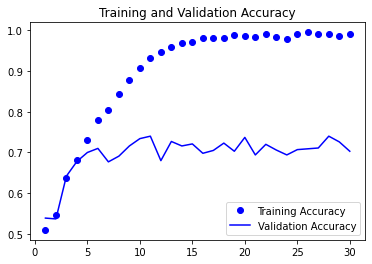

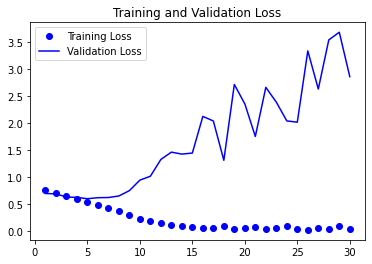

In [87]:
# history 객체를 이용한 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

import matplotlib.pyplot as plt
plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b-',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b-',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [88]:
datagen = ImageDataGenerator(
    rotation_range=40, # 40도 내외에서 이미지의 회전 결정
    width_shift_range=0.2, # 수평(좌우)으로 20% 이내에서 움직여봐라
    height_shift_range=0.2, # 수직(상하)으로 20% 이내에서 움직여봐라
    shear_range=0.2, # 20% 내외에서 이미지의 기울기 결정
    zoom_range=0.2, # 20% 내외에서 이미지 확대
    horizontal_flip=True, # 좌우 반전 속성 ON
    fill_mode='nearest' # 이미지가 움직임에 따라 생긴 빈 공간을 주변과 비슷하게 채우도록 처리하겠다
)

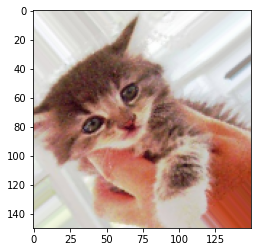

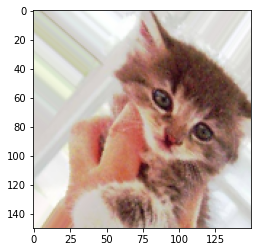

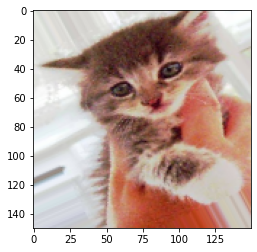

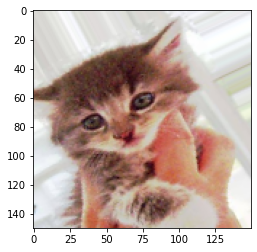

In [89]:
# datagen 시험 동작
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join (train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path,target_size=(150,150))

x = image.img_to_array(img) # 이미지 x 좌표
x = x.reshape((1,)+x.shape)

i = 0
for batch in datagen.flow(x,batch_size=1): # 1개당 1번씩 데이터 변환을 해줄 것
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0])) 
    i += 1
    if i %4 == 0:
        break
        
plt.show()

In [90]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, # 타깃 디렉터리 
                                                    target_size=(150, 150),# 모든 이미지를 150 × 150 크기로 바꿉니다
                                                    batch_size=32,    
                                                    class_mode='binary') # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,        
                                                        class_mode='binary')
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
 63/100 [=================>............] - 31s 486ms/step - loss: 0.8051 - accuracy: 0.6160 - val_loss: 0.6456 - val_accuracy: 0.6910
